In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
automl = pd.read_excel('../Output/v1/scores_automl.xlsx')
nn = pd.read_excel('../Output/v2_1/scores_lstm.xlsx')
arima = pd.read_excel('../Output/v3/scores_arima.xlsx')
torch = pd.read_excel('../Output/v4/scores_torch.xlsx')
xgboost = pd.read_excel('../Output/v5/scores_xgboost.xlsx')

models = ['automl', 'nn', 'arima', 'torch', 'xgboost']

stack = [automl, nn, arima, torch, xgboost]

In [4]:
wrmse = lambda rmse: (rmse[:11] * (1 / 11)).sum()
wrmse_vals = {}

for model in models:
    metric = wrmse(stack[models.index(model)]["RMSE"])
    wrmse_vals[model] = metric

In [5]:
wrmse_vals

{'automl': 0.0910909090909091,
 'nn': 0.08913640587115884,
 'arima': 0.07500016217479046,
 'torch': 0.09791456241015854,
 'xgboost': 0.06546901184895507}

In [6]:
automl_forecasts = pd.read_excel('../Output/v1/previsoes_automl.xlsx')
nn_forecasts = pd.read_excel('../Output/v2_1/previsoes_lstm.xlsx')
arima_forecasts = pd.read_excel('../Output/v3/previsoes_arima.xlsx')
torch_forecasts = pd.read_excel('../Output/v4/previsoes_torch.xlsx')
xgboost_forecasts = pd.read_excel('../Output/v5/previsoes_xgboost.xlsx')

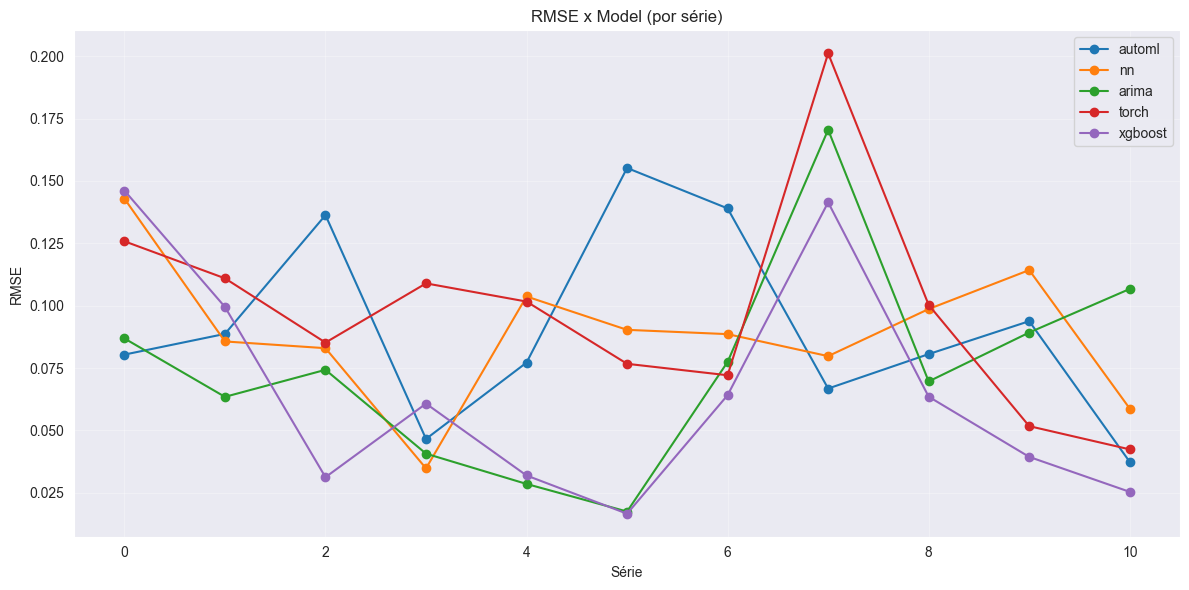

In [7]:
plt.figure(figsize=(12, 6))
for df, model_name in zip(stack, models):
    plt.plot(df['RMSE'].values, marker='o', label=model_name)
plt.title('RMSE x Model (por série)')
plt.xlabel('Série')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

- #1 e #7 representaram séries com alto erro (difícil predict)
- Percebe-se que uma rede neural ajustada por busca bayesiana obteve um erro mais constante
- AUTOML demonstra maior perturbação (provavelmente por cada série ajustar-se por um modelo)
- Visando acurácia, Xgboost será o modelo campeão.